<a href="https://colab.research.google.com/github/Venkat7123/Implementation-of-K-Means-Clustering-for-Customer-Segmentation/blob/main/MLEx07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [10]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10)
  kmeans.fit(df.iloc[:,3:])
  wcss.append(kmeans.inertia_)

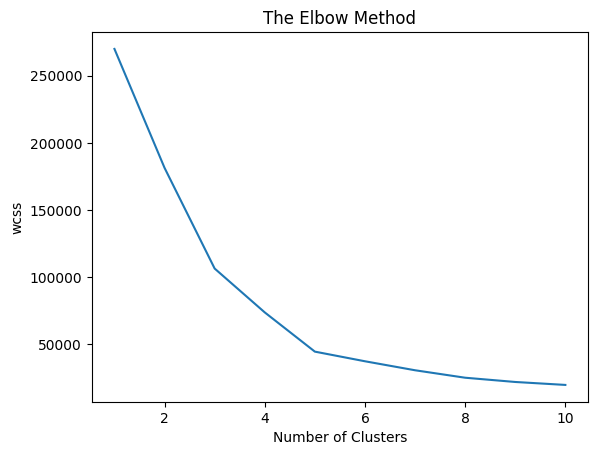

In [11]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.title('The Elbow Method')
plt.show()

In [14]:
km = KMeans(n_clusters=5, n_init=10)
km.fit(df.iloc[:,3:])
y_pred = km.predict(df.iloc[:,3:])
y_pred

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [15]:
df['cluster'] = y_pred
dt0=df[df["cluster"]==0]
dt1=df[df["cluster"]==1]
dt2=df[df["cluster"]==2]
dt3=df[df["cluster"]==3]
dt4=df[df["cluster"]==4]

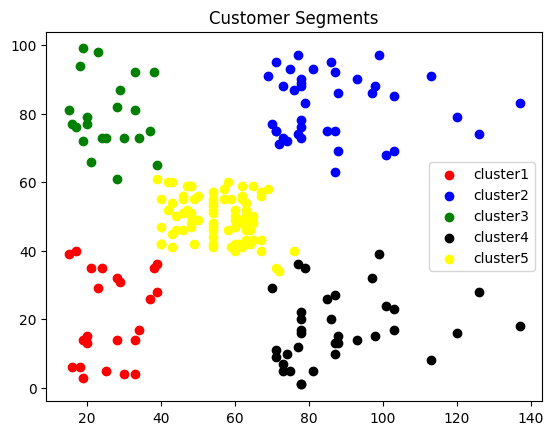

In [19]:
plt.scatter(dt0["Annual Income (k$)"],dt0["Spending Score (1-100)"],c="red",label="cluster1")
plt.scatter(dt1["Annual Income (k$)"],dt1["Spending Score (1-100)"],c="blue",label="cluster2")
plt.scatter(dt2["Annual Income (k$)"],dt2["Spending Score (1-100)"],c="green",label="cluster3")
plt.scatter(dt3["Annual Income (k$)"],dt3["Spending Score (1-100)"],c="black",label="cluster4")
plt.scatter(dt4["Annual Income (k$)"],dt4["Spending Score (1-100)"],c="yellow",label="cluster5")
plt.legend()
plt.title("Customer Segments")
plt.show()